Epsilon set to 0.
Unique actions taken: {1, 2, 4, 5}
Final action: {'action': 5}


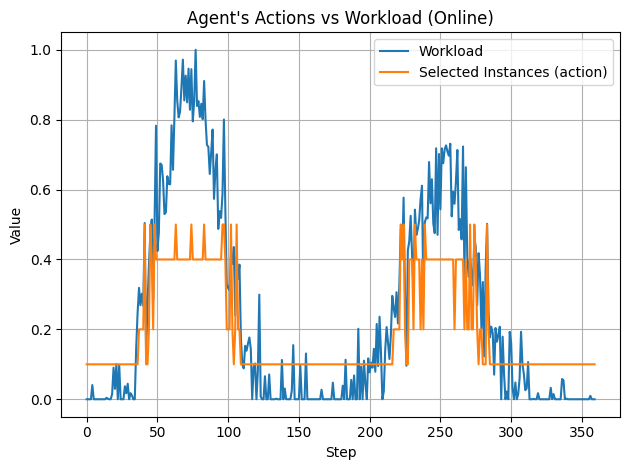

In [2]:
!pip install matplotlib
import json
import requests
import numpy as np

MAX_INSTANCES = 10
AGENT_URL = "http://127.0.0.1:5002"

# def _dict_to_obs(d):
#     return np.array([d[k] for k in ["n_instances", "pressure", "queue_length_dominant", "utilization", "workload"]], dtype=np.float32)

# def get_observation(step: int, n_instances: int, previous_workload: float = None):
#     # If you want deterministic workload over time
#     if previous_workload is None:
#         workload = np.clip(np.random.uniform(0.3, 0.8), 0.0, 1.0)
#     else:
#         workload = np.clip(previous_workload + np.random.uniform(-0.05, 0.05), 0.0, 1.0)

#     denom = max(n_instances / MAX_INSTANCES, 1e-3)
#     utilization = np.clip(workload / denom, 0.0, 1.0)
#     pressure = np.clip(utilization + np.random.normal(0, 0.05), 0.0, 1.0)
#     queue = np.clip(workload - utilization + np.random.normal(0, 0.05), 0.0, 1.0)

#     obs = {
#         "n_instances": n_instances / MAX_INSTANCES,
#         "pressure": pressure,
#         "queue_length_dominant": queue,
#         "utilization": utilization,
#         "workload": workload
#     }
#     print(obs)
    
#     return obs, workload

response = requests.post(f"{AGENT_URL}/set_epsilon", json={"start": 0.0, "end": 0.0, "schedule_timesteps": 0})
if not response.ok:
    print(f"Failed to set epsilon: {response.text}")
else:
    print("Epsilon set to 0.")
    
# Run the simulation
n_instances = 1
actions = []
workloads = []

workload = None

with open('all_observations.json', 'r') as file:
    all_observations = json.load(file)
    
unique_actions = set()

for step in range(len(all_observations)):
    # observation, workload = get_observation(step, n_instances, previous_workload=workload)
    observation = all_observations[step]  # Use pre-generated observations
    # workloads.append(observation[4])
    workloads.append(observation["workload"])

    # response = requests.post(f'{AGENT_URL}/action', json={'observation': _dict_to_obs(observation).tolist()})
    # print(f"Step {step}: {observation}")
    response = requests.post(f'{AGENT_URL}/action', json={'observation': observation})
    if response.ok:
        n_instances = response.json()["action"]
        actions.append(n_instances/10)  # Normalize to [0, 1]
    else:
        print(f"Error at step {step}: {response.text}")
        break
    
    unique_actions.add(n_instances)
    
print(f"Unique actions taken: {unique_actions}")
    
observation = all_observations[75]
observation["n_instances"] = 0.6
observation["workload"] = 1.0
observation["pressure"] = 1
response = requests.post(f'{AGENT_URL}/action', json={'observation': observation})
print(f"Final action: {response.json()}")

    # break

# Plotting
import matplotlib.pyplot as plt
plt.plot(workloads, label="Workload")
plt.plot(actions, label="Selected Instances (action)")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend()
plt.title("Agent's Actions vs Workload (Online)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import gym
from gym.spaces import Discrete

action_space = Discrete(6, start=1)

samples = [action_space.sample() for _ in range(100)]
print("Sampled actions:", samples)

Sampled actions: [3, 2, 1, 3, 5, 5, 2, 4, 3, 4, 1, 4, 6, 4, 3, 5, 5, 4, 2, 3, 6, 2, 5, 5, 4, 1, 3, 1, 5, 4, 5, 5, 5, 1, 1, 3, 6, 4, 6, 1, 6, 5, 5, 4, 3, 6, 1, 3, 1, 3, 4, 2, 4, 4, 2, 1, 2, 5, 6, 1, 6, 2, 2, 6, 3, 4, 2, 5, 3, 1, 2, 4, 2, 2, 5, 6, 4, 5, 2, 2, 5, 5, 2, 3, 1, 3, 1, 2, 4, 3, 5, 1, 1, 1, 3, 3, 6, 4, 1, 2]
